![](https://i.ibb.co/LnJCPwg/WEATHER-ANALYSIS-1.jpg)

<div style = '
    background-color: lightblue;
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid rgb(59, 98, 169);
    border-radius: 5px;
    padding: 0.75rem;
    font-family: "Courier New";
    '>
    DATASET DESCRIPTION
</div>

<p>The weather dataset is a time-series data set with per hour information about the weather conditions at a particular locaton. It records the following information;</p>
<ul style="list-style-type:none;">
    <li style="padding: 0.25rem 0;"><b>Temperature:</b> The measure of how hot or cold the atmosphere is at a specific time and location, typically recorded in degrees Celsius (°C).</li>
    <li style="padding: 0.25rem 0;"><b>Dew Point Temperature:</b> The temperature at which air becomes saturated with moisture and dew forms, indicating the amount of moisture in the air.</li>
    <li style="padding: 0.25rem 0;"><b>Relative Humidity:</b> The percentage of moisture in the air relative to the maximum amount of moisture the air can hold at that temperature, crucial for understanding precipitation likelihood.</li>
    <li style="padding: 0.25rem 0;"><b>Wind Speed:</b> The speed at which air is moving horizontally through the atmosphere, measured in kilometers per hour (km/h)</li>
    <li style="padding: 0.25rem 0;"><b>Visibility:</b> The distance one can clearly see, measured in kilometers (km) important for transportation safety.</li>
    <li style="padding: 0.25rem 0;"><b>Pressure:</b> The force exerted by the weight of the air above a specific point, measured in kPa, indicating weather patterns.</li>
    <li style="padding: 0.25rem 0;"><b>Conditions:</b> A qualitative description of the overall weather at a specific time, such as sunny, cloudy, or rainy, providing a quick summary of the weather.</li>
</ul>


<div style = '
    background-color: lightblue;
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid rgb(59, 98, 169);
    border-radius: 5px;
    padding: 0.75rem;
    font-family: "Courier New";
    '>
    IMPORTING RELEVANT MODULES
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-data/Weather Data.csv


In [2]:
warnings.filterwarnings('ignore')

<div style = '
    background-color: lightblue;
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid rgb(59, 98, 169);
    border-radius: 5px;
    padding: 0.75rem;
    font-family: "Courier New";
    '>
    LOADING THE DATASETS
</div>

In [3]:
data = pd.read_csv('/kaggle/input/weather-data/Weather Data.csv')

In [4]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


<div style = '
    background-color: lightblue;
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid rgb(59, 98, 169);
    border-radius: 5px;
    padding: 0.75rem;
    font-family: "Courier New";
    '>
    GETTING INFORMATION ON THE DATAFRAME
</div>

In [5]:
data.shape

(8784, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


<div style = '
    background-color: lightblue;
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid rgb(59, 98, 169);
    border-radius: 5px;
    padding: 0.75rem;
    font-family: "Courier New";
    '>
    DATA CLEANING
</div>

In [8]:
# Checking for null values in the dataset
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [9]:
# Spliting the date and time into seperate columns
data[['Date', 'Time']] = data['Date/Time'].str.split(' ', expand = True)

In [10]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00


In [11]:
#Convert date column to date
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00


In [13]:
# Getting seasons and seperating the month into a new column
def get_season(month):
    if month >=3 and month <= 5:
        return 'Spring'
    elif month>= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

data['Month'] = data['Date'].dt.month
data['Season'] = data['Month'].apply(get_season)

In [14]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Month,Season
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00,1,Winter
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00,1,Winter


In [15]:
# Making the month their name value
import calendar

data['Month'] = data['Month'].apply(lambda x: calendar.month_name[x])

In [16]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Month,Season
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00,January,Winter
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00,January,Winter


In [17]:
# Rearranging the columns
data = data[['Date', 'Month', 'Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 
             'Visibility_km', 'Press_kPa', 'Weather', 'Season']]

In [18]:
data.head(2)

,Date,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Season
0,2012-01-01,January,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Winter
1,2012-01-01,January,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Winter


In [19]:
# Replacing the column name weather with weather comdition
data.rename(columns = {'Weather': 'Weather Condition'}, inplace = True)

In [20]:
data.head(2)

,Date,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition,Season
0,2012-01-01,January,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Winter
1,2012-01-01,January,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Winter


<div style = '
    background-color: lightblue;
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid rgb(59, 98, 169);
    border-radius: 5px;
    padding: 0.75rem;
    font-family: "Courier New";
    '>
    EXPLORATORY DATA ANALYSIS
</div>

In [21]:
# Checking for duplicate values
data.duplicated().sum()

0

In [22]:
#Checking all the unique values in my dataset
data.nunique()

Date                 366
Month                 12
Time                  24
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather Condition     50
Season                 4
dtype: int64

<div style = '
    background-color: rgb(59, 98, 169);
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid darkblue;
    border-radius: 5px;
    font-family: "Courier New";
    '>
    Temperature Distribution by Month
</div>

<Axes: xlabel='Month', ylabel='Temp_C'>

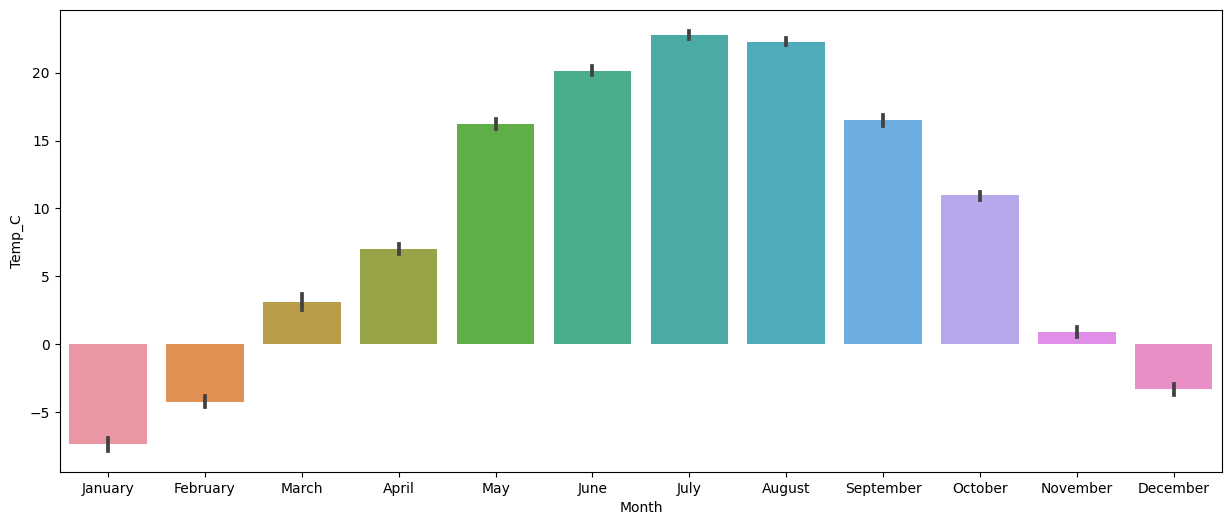

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'Month', y= 'Temp_C', data= data)

In [24]:
# Checking the frequency of each weather condition
data['Weather Condition'].value_counts()

Weather Condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

In [25]:
# Getting all the unique Windspeed values
data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

In [26]:
# Number of times each Windspeed value appeared
data['Wind Speed_km/h'].value_counts()

Wind Speed_km/h
9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
83      1
70      1
63      1
54      1
Name: count, dtype: int64

<div style = '
    background-color: rgb(59, 98, 169);
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid darkblue;
    border-radius: 5px;
    font-family: "Courier New";
    '>
    Relationship between Windspeed and Time
</div>

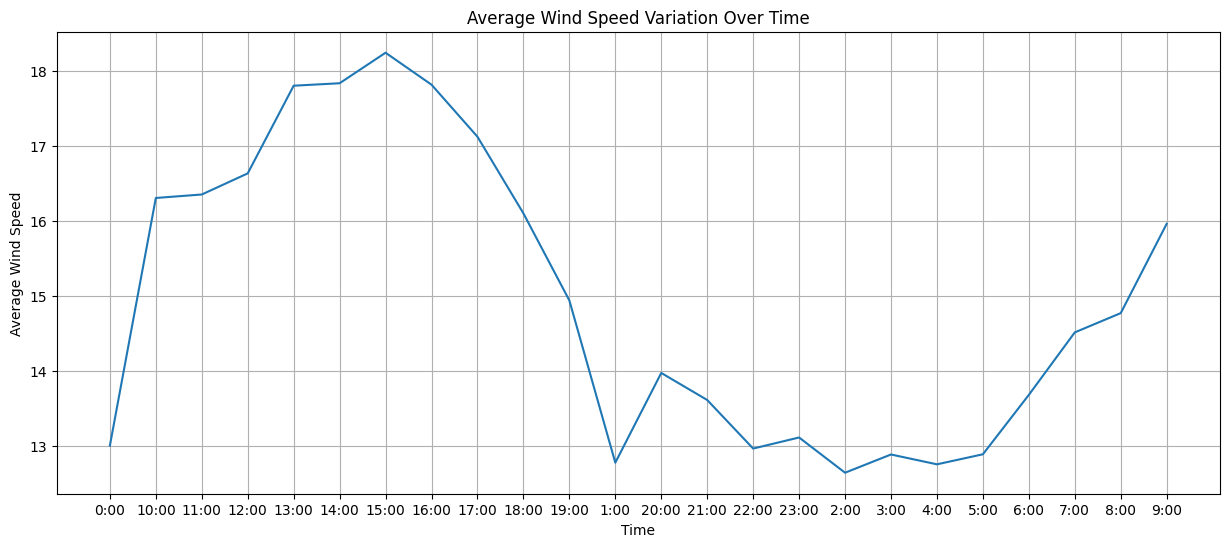

In [27]:
# Checking if there's any relationship between windspeed and time

avg_windspeed = data.groupby('Time')['Wind Speed_km/h'].mean()
plt.figure(figsize=(15, 6))

plt.plot(avg_windspeed.index, avg_windspeed.values)
plt.xlabel('Time')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed Variation Over Time')
plt.grid()

In [28]:
# What is the mean 'Visibility' in the dataset?

mean_visibility = data['Visibility_km'].mean().round(2)
print(f'The mean visibility of the data is {mean_visibility}km')

The mean visibility of the data is 27.66km


In [29]:
# Find all the instances where 'Snow' was recorded.

data[data['Weather Condition'].str.contains('Snow')]

,Date,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition,Season
41,2012-01-02,January,17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,Winter
44,2012-01-02,January,20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,Winter
45,2012-01-02,January,21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,Winter
47,2012-01-02,January,23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,Winter
48,2012-01-03,January,0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,Winter
...,...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31,December,19:00,0.1,-2.7,81,30,9.7,100.13,Snow,Winter
8780,2012-12-31,December,20:00,0.2,-2.4,83,24,9.7,100.03,Snow,Winter
8781,2012-12-31,December,21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Winter
8782,2012-12-31,December,22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,Winter


<div style = '
    background-color: rgb(59, 98, 169);
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid darkblue;
    border-radius: 5px;
    font-family: "Courier New";
    '>
    Temperature Distribution by Season
</div>

In [30]:
avg_temp = data.groupby('Season')['Temp_C'].mean()
avg_temp

Season
Autumn     9.473397
Spring     8.808786
Summer    21.751857
Winter    -4.983929
Name: Temp_C, dtype: float64

<div style = '
    background-color: rgb(59, 98, 169);
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid darkblue;
    border-radius: 5px;
    font-family: "Courier New";
    '>
    Weather Varibles Distribution by Date
</div>

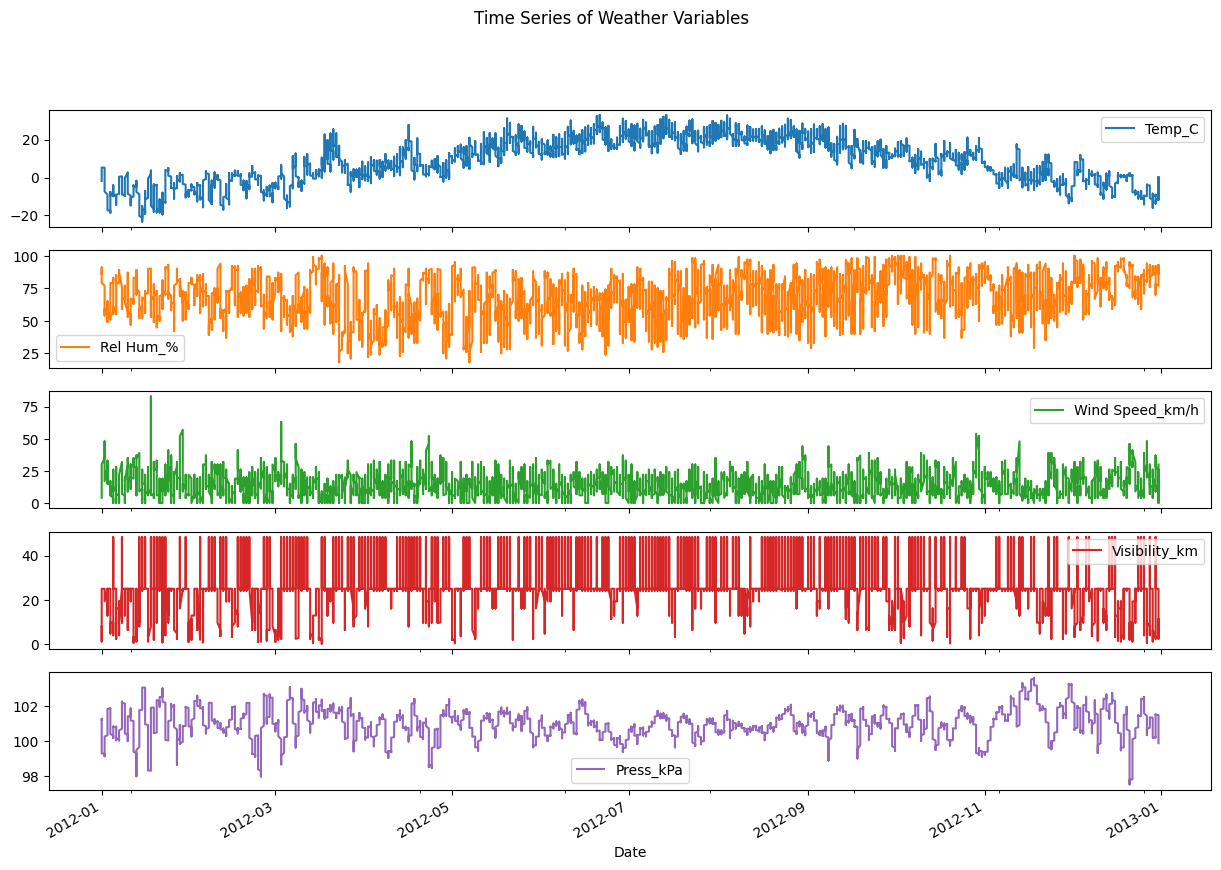

In [31]:
data.set_index('Date', inplace=True)
data[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].plot(subplots=True, figsize=(15, 10))
plt.suptitle('Time Series of Weather Variables')
plt.show()

<div style = '
    background-color: rgb(59, 98, 169);
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid darkblue;
    border-radius: 5px;
    font-family: "Courier New";
    '>
    Relationship between Weather Condition and Wind Speed
</div>

In [32]:
weather_windspeed = data.groupby('Weather Condition')['Wind Speed_km/h'].mean().reset_index()

In [33]:
weather_windspeed.head(2)

,Weather Condition,Wind Speed_km/h
0,Clear,10.557315
1,Cloudy,16.127315


In [34]:
weather_windspeed = weather_windspeed.sort_values('Wind Speed_km/h', ascending = True)

Text(0.5, 1.0, 'Relationship between Weather Condition and Windspeed')

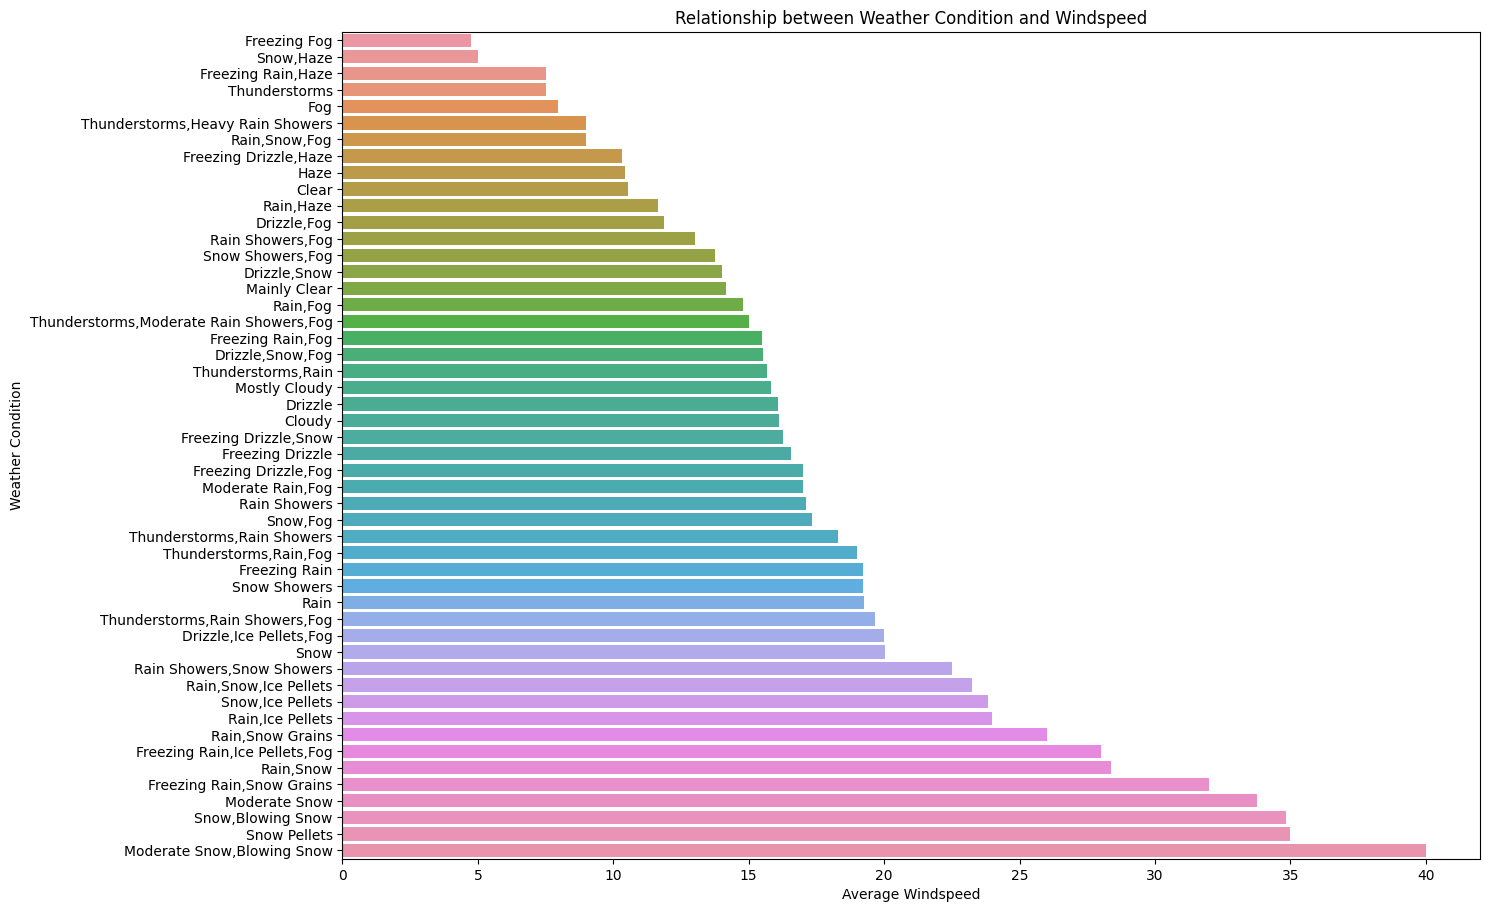

In [35]:
plt.figure(figsize=(15,9))
sns.barplot(x = 'Wind Speed_km/h', y = 'Weather Condition', data = weather_windspeed)
plt.xlabel('Average Windspeed')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.title('Relationship between Weather Condition and Windspeed')

<div style = '
    background-color: rgb(59, 98, 169);
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid darkblue;
    border-radius: 5px;
    font-family: "Courier New";
    '>
    Distribution of Weather Variables
</div>

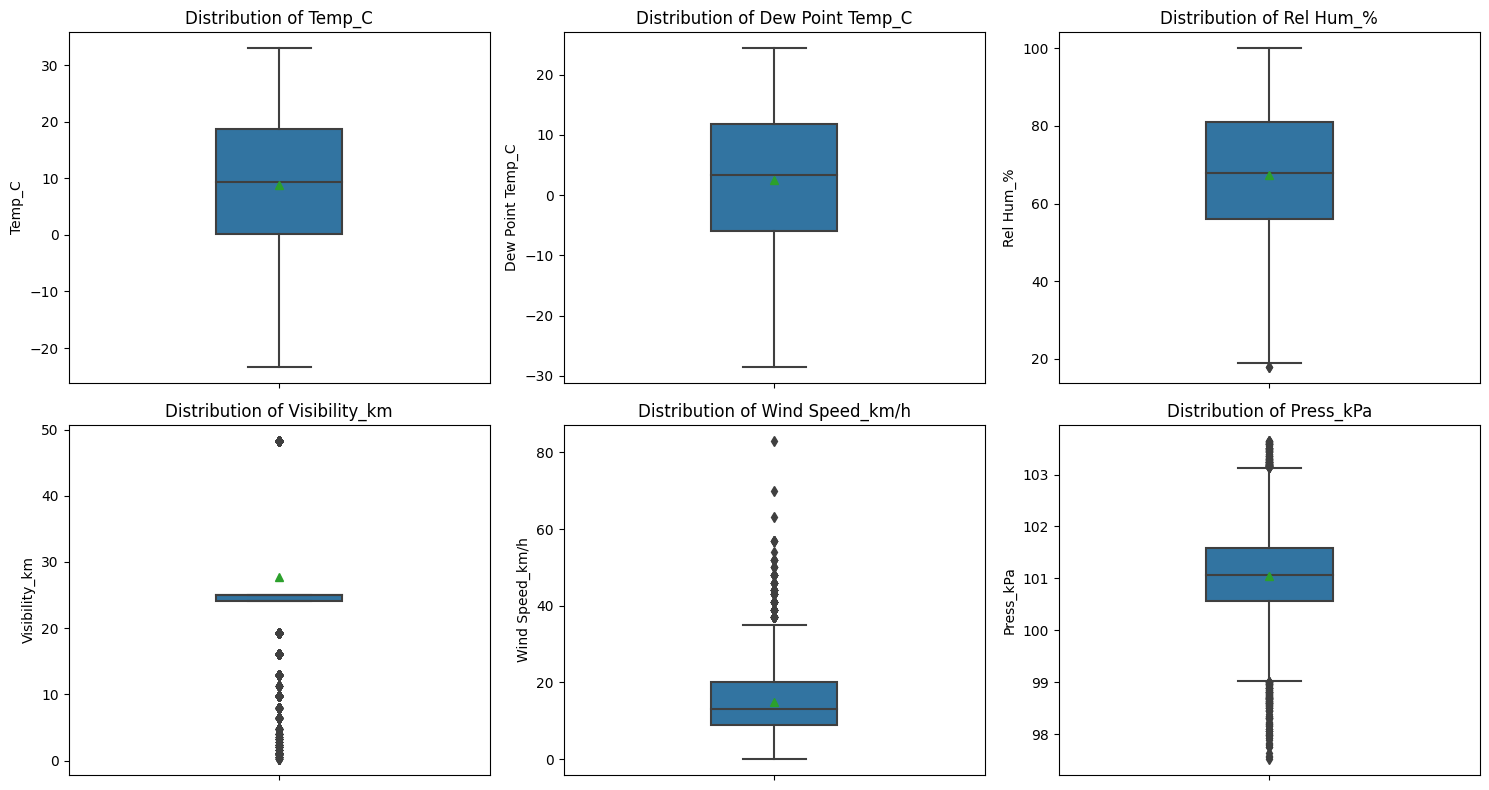

In [36]:
# Parameters to plot
params = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km', 'Wind Speed_km/h', 'Press_kPa']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()  # Flatten the axes array if necessary

# Loop through the list of parameters and create a boxplot for each
for i, param in enumerate(params):
    sns.boxplot(y=param, data=data, width=0.3, showmeans=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {param}')

# Adjust layout
plt.tight_layout()

<div style = '
    background-color: rgb(59, 98, 169);
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid darkblue;
    border-radius: 5px;
    font-family: "Courier New";
    '>
    Correlation between Weather Variables
</div>

In [37]:
correlation_matrix = data.corr(numeric_only= True)

In [38]:
correlation_matrix.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847


Text(0.5, 1.0, 'Correlation Matrix')

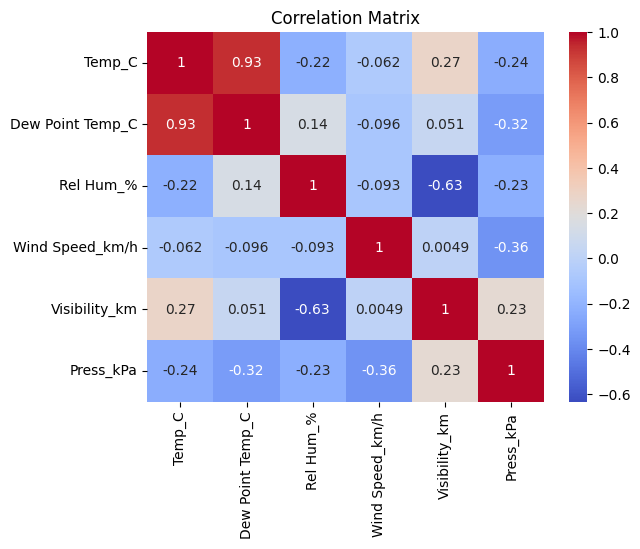

In [39]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

<div style = '
    background-color: rgb(59, 98, 169);
    font-weight: bold;
    font-size: 2rem;
    color: white;
    text-align: center;
    border: 1.5px solid darkblue;
    border-radius: 5px;
    font-family: "Courier New";
    '>
    Most Frequent Weather Conditions
</div>

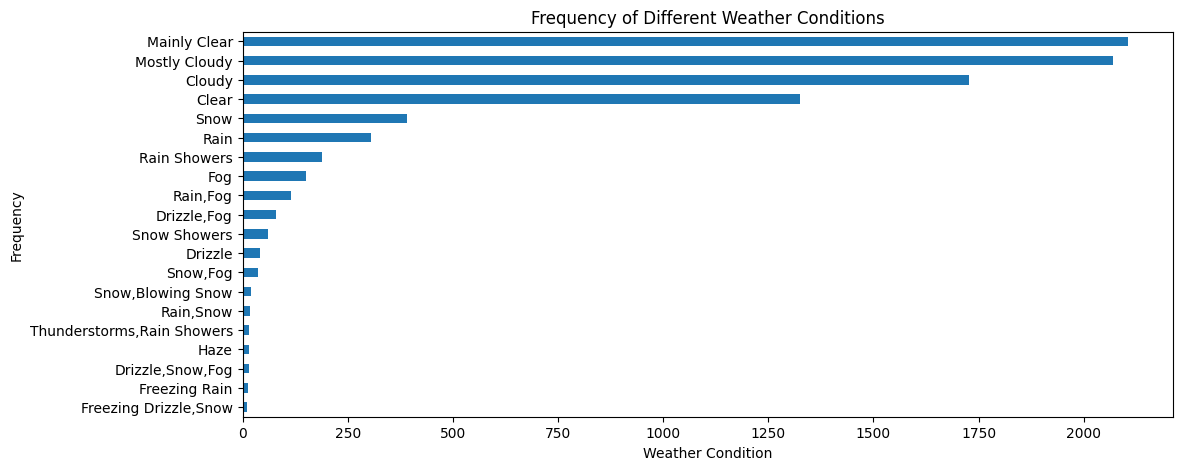

In [40]:
weather_counts = data['Weather Condition'].value_counts(ascending=True)[-20:]
weather_counts.plot(kind='barh', figsize=(12, 5))
plt.title('Frequency of Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()


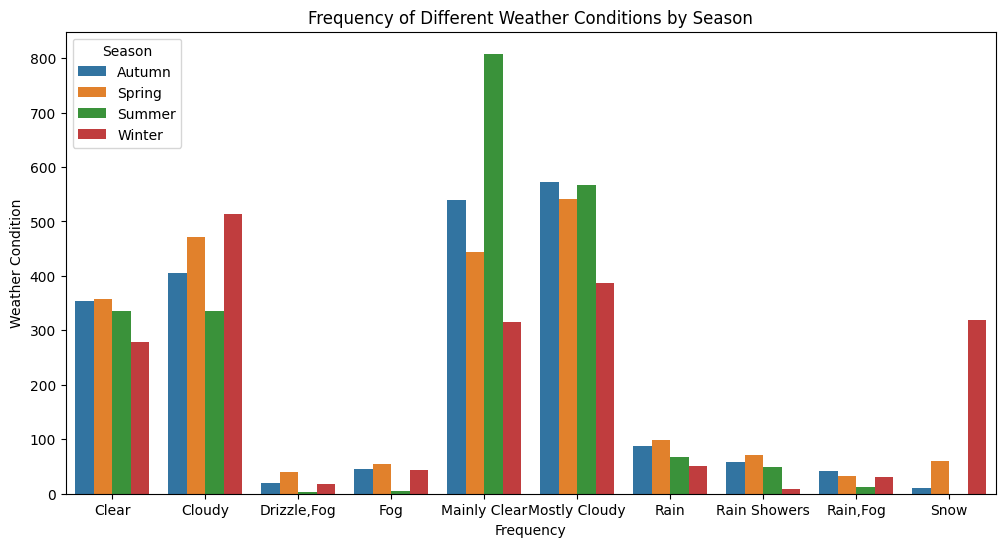

In [41]:
# Grouping the data by 'Season' and 'Weather Condition' and count the occurrences
grouped_data = data.groupby(['Season', 'Weather Condition']).size().reset_index(name='Count')

# Getting the top 20 weather conditions across all seasons
top_conditions = grouped_data.groupby('Weather Condition')['Count'].sum().nlargest(10).index

# Filter the original grouped data to include only the top conditions
filtered_data = grouped_data[grouped_data['Weather Condition'].isin(top_conditions)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Weather Condition', y='Count', hue='Season', ci=None)
plt.title('Frequency of Different Weather Conditions by Season')
plt.xlabel('Frequency')
plt.ylabel('Weather Condition')
plt.legend(title='Season')
plt.show()


In [42]:
data.groupby('Weather Condition').mean(numeric_only= True)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857
